<a href="https://colab.research.google.com/github/Renatolopo/sistemas-de-apoio-a-decisao/blob/main/SAD_Implementa%C3%A7%C3%A3o_de_um_classificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Renato Lopo

Escolher uma base de dados que seja do problema de classificação (ou adaptar a base que já está sendo trabalhada).
Fazer o pré-processamento dos dados, aplicar os métodos de knn e árvore de decisão. Pesquisar um outro algoritmo de classificação e também aplicar.
Apresentar a comparação dos resultados dos classificadores.

### Importação dos dados

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Base de dados: https://www.kaggle.com/vivovinco/nba-player-stats


Essa base de dados contem as estatisticas de jogadores de basquete da NBA temporada 2021-2022.

O meu objetivo aqui e classificalos usando  a coluna `PTS` (pontos por partida)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2021-2022 NBA Player Stats.csv", delimiter=';', encoding='ISO-8859-1')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,0.412,0.3,1.3,0.233,3.1,6.9,0.444,0.430,0.9,1.6,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9
1,2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,0.521,0.0,0.0,0.000,2.6,4.9,0.521,0.521,1.6,2.8,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7
2,3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,0.518,0.0,0.0,0.000,6.9,13.3,0.520,0.518,4.9,6.3,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7
3,4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,0.372,0.2,1.5,0.105,1.2,2.2,0.554,0.394,0.4,0.8,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4
4,5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,0.574,0.4,1.1,0.333,5.6,9.2,0.603,0.592,1.6,1.8,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8


### Pre-processamento

In [ ]:
df.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [ ]:
df.Pos.unique()

array(['C', 'PF', 'SG', 'PG', 'SF'], dtype=object)

In [ ]:
# converte as informações da coluna Pos em uma variavel númerica
df = pd.get_dummies(df, columns=['Pos'])

# remove colunas RK, Player, Tm
df = df.drop(columns=['Rk', 'Player', 'Tm'])
df

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,22,34,20,25.3,3.4,8.1,0.412,0.3,1.3,0.233,3.1,6.9,0.444,0.430,0.9,1.6,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9,1,0,0,0,0
1,28,44,43,25.7,2.6,4.9,0.521,0.0,0.0,0.000,2.6,4.9,0.521,0.521,1.6,2.8,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7,1,0,0,0,0
2,24,21,21,32.9,6.9,13.3,0.518,0.0,0.0,0.000,6.9,13.3,0.520,0.518,4.9,6.3,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7,1,0,0,0,0
3,21,25,0,10.5,1.4,3.8,0.372,0.2,1.5,0.105,1.2,2.2,0.554,0.394,0.4,0.8,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4,0,1,0,0,0
4,36,32,10,23.1,5.9,10.3,0.574,0.4,1.1,0.333,5.6,9.2,0.603,0.592,1.6,1.8,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,33,24,0,13.9,2.7,4.8,0.560,0.0,0.1,0.000,2.7,4.7,0.575,0.560,0.4,0.8,0.450,1.4,2.0,3.4,2.3,0.8,0.3,1.1,1.4,5.8,0,1,0,0,0
586,23,41,41,34.8,9.3,20.5,0.455,2.8,7.5,0.372,6.5,13.0,0.503,0.523,6.5,7.2,0.901,0.7,3.3,4.0,9.4,1.0,0.1,4.2,1.6,27.9,0,0,1,0,0
587,23,36,10,15.1,2.7,5.2,0.521,0.0,0.2,0.143,2.7,5.0,0.536,0.524,0.9,1.4,0.640,1.8,4.6,6.4,1.1,0.4,0.5,0.9,1.8,6.4,1,0,0,0,0
588,29,27,0,13.1,1.9,3.3,0.567,0.0,0.1,0.000,1.9,3.2,0.593,0.567,1.4,1.8,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,1,0,0,0,0


In [ ]:
def get_PTS(val):
  if val <= 5:
    return 5
  elif val <= 10:
    return 10
  elif val <= 15:
    return 15
  elif val <= 20:
    return 20
  elif val <= 25:
    return 25
  else:
    return 30

In [ ]:
# defino y como valores da coluna PTS, usando o intervalo da função acima para ficar mais simples
y = df['PTS'].apply(get_PTS)

In [ ]:
# definindo x
X = df.drop(columns=['PTS'])

In [ ]:
print("Dataframe",df.shape)
print("Atributos",X.shape)
print("Classe",y.shape)

Dataframe (590, 31)
Atributos (590, 30)
Classe (590,)


In [ ]:
# divisão treino e teste

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=22,stratify=y)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (472, 30)
X_test (118, 30)
y_train (472,)
y_test (118,)


## KNN

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
resultado = knn.predict(X_test)
resultado

array([ 5,  5,  5, 10,  5, 10,  5, 10, 15,  5, 15, 10, 10,  5, 10, 10, 20,
       10,  5,  5, 15,  5,  5,  5,  5,  5,  5, 10,  5, 10, 10,  5,  5,  5,
       15, 15, 15, 10,  5, 10, 25,  5, 10, 25, 10,  5, 25, 10, 20,  5,  5,
       10,  5, 15, 10, 10, 25, 10, 15, 10, 10, 10, 10,  5, 10,  5,  5, 10,
       25, 10, 10, 10,  5, 10,  5, 15, 15, 10,  5, 10, 10, 10, 10,  5,  5,
        5,  5,  5, 20,  5,  5,  5,  5, 10, 10, 15, 20,  5, 10, 25, 10, 15,
       20,  5,  5, 15, 20,  5, 10,  5, 30, 10,  5,  5,  5, 10, 10,  5])

### Avalição do KNN

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   5  10  15  20  25  30  All
Real                                
5        46   2   0   0   0   0   48
10        3  31   3   0   0   0   37
15        0   9   7   1   0   0   17
20        0   1   3   3   3   0   10
25        0   0   0   2   2   0    4
30        0   0   0   0   1   1    2
All      49  43  13   6   6   1  118


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           5       0.94      0.96      0.95        48
          10       0.72      0.84      0.77        37
          15       0.54      0.41      0.47        17
          20       0.50      0.30      0.37        10
          25       0.33      0.50      0.40         4
          30       1.00      0.50      0.67         2

    accuracy                           0.76       118
   macro avg       0.67      0.58      0.61       118
weighted avg       0.76      0.76      0.75       118



In [ ]:
#Otimizando o parâmetro k utilizando o GridSearch
from sklearn.model_selection import GridSearchCV
k_list = list(range(1,31))
parametros = dict(n_neighbors=k_list)
grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [ ]:
print("Melhores parametros {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))

Melhores parametros {'n_neighbors': 1} com o valor de acurácia 0.7839193729003359 


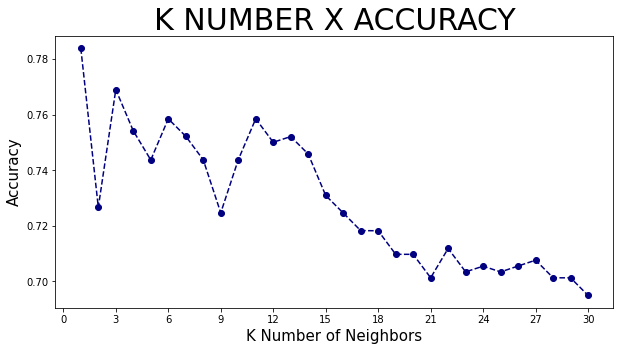

In [ ]:
#gráfico da acurácia em relação ao número de vizinhos
import matplotlib.pyplot as plt
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

## Árvore de decisão

In [ ]:
#importando um algoritmo de classificação: árvore de decisão
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [ ]:
#declarar tree como o algoritmo
clf = tree.DecisionTreeClassifier()

In [ ]:
#treinar o algoritmo com a base de treinamento
clf = clf.fit(X_train, y_train)

In [ ]:
#Features mais importantes
for feature,importancia in zip(df.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

Age:0.0
G:0.0
GS:0.012287893971947239
MP:0.0
FG:0.7819385918502673
FGA:0.03278118957926908
FG%:0.002967247123907714
3P:0.023065003445981707
3PA:0.03736168286662618
3P%:0.005764937269306417
2P:0.0
2PA:0.0
2P%:0.0
eFG%:0.00964355315270007
FT:0.010680851081376813
FTA:0.005587733603531313
FT%:0.040918670303351126
ORB:0.007121393097378513
DRB:0.0044508706858615715
TRB:0.0
AST:0.015391195865940618
STL:0.005341044823033887
BLK:0.0
TOV:0.0
PF:0.0
PTS:0.0
Pos_C:0.0
Pos_PF:0.0
Pos_PG:0.0
Pos_SF:0.004698141279520547


In [ ]:
resultado = clf.predict(X_test)
resultado

array([ 5,  5,  5, 10,  5, 15,  5, 15, 15,  5, 15, 10, 15,  5, 15, 10, 20,
       15,  5, 10, 15,  5,  5,  5,  5,  5,  5, 10,  5, 15, 10,  5,  5,  5,
       15, 15, 15, 15,  5, 15, 25,  5, 10, 20,  5,  5, 25, 10, 20,  5,  5,
       10,  5, 20, 10, 10, 30, 10, 20, 10, 15, 10, 10,  5, 10,  5,  5, 10,
       20, 10, 10, 10,  5, 10,  5, 15, 15, 10,  5, 10, 10, 10, 10,  5,  5,
       10,  5,  5, 15,  5,  5,  5,  5, 15, 10, 20, 20, 10, 15, 20, 10, 10,
       25,  5,  5, 15, 20,  5, 20,  5, 25, 15,  5,  5,  5, 10, 10,  5])

In [ ]:
df["Qualidade da predição"] = clf.predict(X)
df.sample(15,random_state=22)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG,Qualidade da predição
296,24,2,0,3.0,0.5,1.0,0.500,0.0,0.5,0.000,0.5,0.5,1.000,0.500,0.0,0.0,0.000,0.5,0.5,1.0,0.5,0.5,0.0,1.0,0.5,1.0,0,0,0,1,0,5
28,27,3,0,4.3,0.0,1.3,0.000,0.0,0.0,0.000,0.0,1.3,0.000,0.000,0.0,1.3,0.000,0.3,0.7,1.0,1.0,0.0,0.0,0.3,0.3,0.0,0,0,1,0,0,5
519,29,26,21,22.5,3.2,6.9,0.469,0.9,3.0,0.291,2.3,3.8,0.610,0.534,1.0,1.5,0.675,1.2,3.8,5.0,0.8,0.4,0.7,1.2,2.4,8.4,1,0,0,0,0,10
345,25,30,16,27.6,3.3,7.9,0.416,2.5,6.6,0.377,0.8,1.3,0.615,0.574,2.4,2.9,0.818,0.5,3.1,3.6,0.9,0.7,0.4,0.6,3.0,11.5,0,0,0,0,1,15
311,24,2,0,4.0,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,5
425,26,12,0,9.3,1.5,3.2,0.474,0.7,1.3,0.500,0.8,1.8,0.455,0.579,0.8,0.8,1.000,0.4,1.9,2.3,0.5,0.3,0.1,0.7,1.1,4.4,0,1,0,0,0,5
566,23,27,15,21.8,2.7,5.7,0.484,0.8,2.5,0.313,2.0,3.2,0.616,0.552,1.1,1.6,0.690,0.9,2.6,3.5,1.1,0.8,0.2,0.9,2.0,7.3,0,0,0,0,1,10
16,36,12,5,19.2,1.3,3.3,0.375,1.0,2.8,0.364,0.3,0.6,0.429,0.525,0.2,0.3,0.500,0.3,2.9,3.3,1.3,0.5,0.2,0.3,0.6,3.7,0,0,0,1,0,5
172,24,6,0,7.7,0.8,2.2,0.385,0.3,0.8,0.400,0.5,1.3,0.375,0.462,0.3,0.7,0.500,0.8,1.5,2.3,0.3,0.2,0.3,0.5,1.8,2.3,0,1,0,0,0,5
30,20,36,36,35.5,5.9,12.5,0.477,0.8,2.4,0.310,5.2,10.1,0.517,0.507,2.1,3.0,0.720,2.8,5.1,7.9,3.4,1.0,0.8,1.9,2.9,14.8,0,1,0,0,0,15


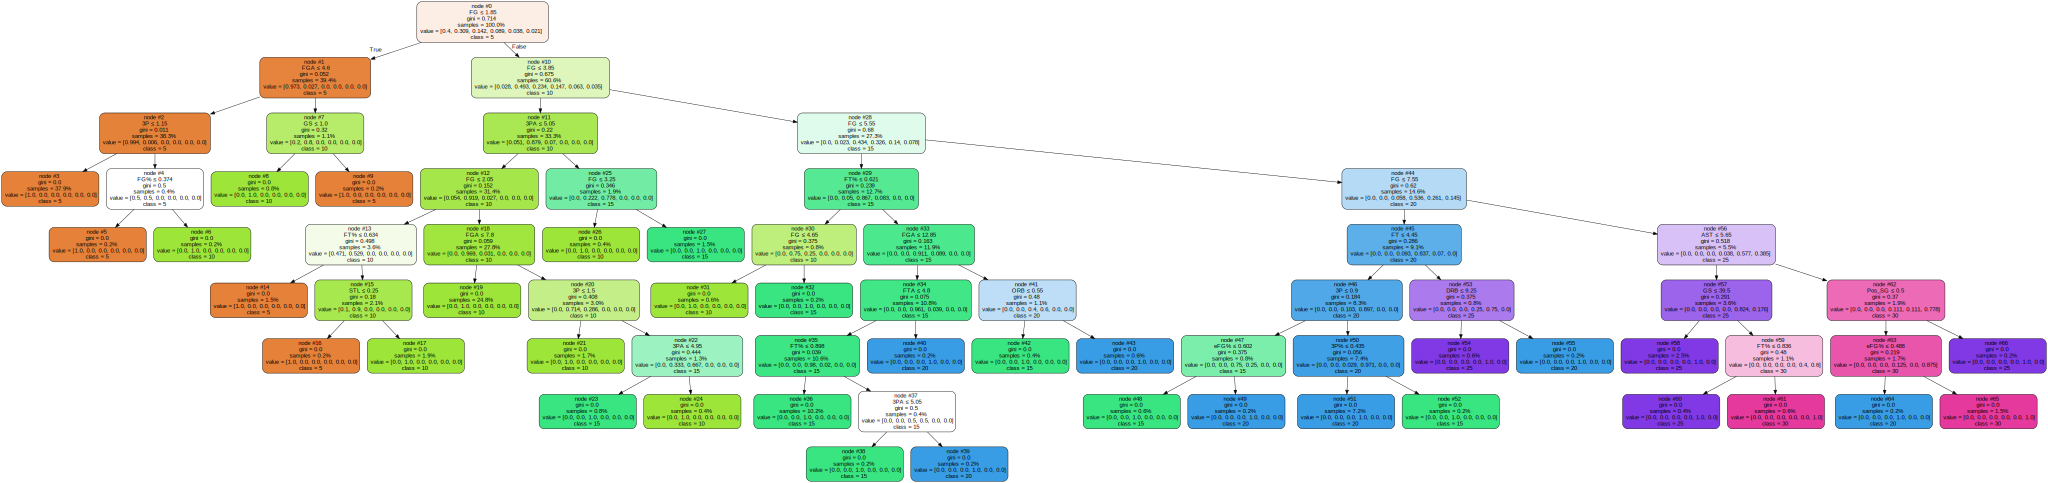

In [ ]:
#plotar a árvore de decisão
import pydot
import graphviz

dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names = df.drop(columns=['PTS','Qualidade da predição']).columns,
         class_names=['5', '10', '15', '20', '25', '30'],  #colocar as classes do teu modelo
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

## Avaliação da árvore de decisão

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   5  10  15  20  25  30  All
Real                                
5        46   2   0   0   0   0   48
10        1  31   5   0   0   0   37
15        0   0  17   0   0   0   17
20        0   0   0   9   1   0   10
25        0   0   0   2   2   0    4
30        0   0   0   0   1   1    2
All      47  33  22  11   4   1  118


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           5       0.98      0.96      0.97        48
          10       0.94      0.84      0.89        37
          15       0.77      1.00      0.87        17
          20       0.82      0.90      0.86        10
          25       0.50      0.50      0.50         4
          30       1.00      0.50      0.67         2

    accuracy                           0.90       118
   macro avg       0.83      0.78      0.79       118
weighted avg       0.91      0.90      0.90       118



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
resultado = gnb.predict(X_test)
resultado

array([ 5,  5,  5, 10,  5, 10,  5, 15, 15,  5, 15, 10, 15,  5, 15, 10, 20,
       15,  5, 10, 15,  5,  5,  5,  5,  5,  5, 10, 10, 15, 10,  5,  5,  5,
       15, 15, 15, 10,  5, 15, 25,  5, 10, 20,  5,  5, 25, 10, 20,  5,  5,
       10,  5, 20, 10, 10, 30, 10, 20, 10, 10, 10, 15,  5, 10,  5,  5, 10,
       25, 10, 10, 10,  5, 10,  5, 10, 15, 10,  5, 10, 10, 10, 10,  5,  5,
        5,  5,  5, 20,  5,  5,  5,  5, 15, 10, 20, 20,  5, 10, 20, 10, 10,
       25, 10,  5, 15, 20, 10, 15,  5, 30, 15,  5,  5,  5, 10, 10,  5])

### Avaliação do Naive Bayes

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   5  10  15  20  25  30  All
Real                                
5        44   4   0   0   0   0   48
10        2  33   2   0   0   0   37
15        0   1  15   1   0   0   17
20        0   0   1   8   1   0   10
25        0   0   0   1   3   0    4
30        0   0   0   0   0   2    2
All      46  38  18  10   4   2  118


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           5       0.96      0.92      0.94        48
          10       0.87      0.89      0.88        37
          15       0.83      0.88      0.86        17
          20       0.80      0.80      0.80        10
          25       0.75      0.75      0.75         4
          30       1.00      1.00      1.00         2

    accuracy                           0.89       118
   macro avg       0.87      0.87      0.87       118
weighted avg       0.89      0.89      0.89       118



## Comparação dos Modelos

In [ ]:
print(f"Árvore de decisão: Treinamento - {clf.score(X_train,y_train):.2f}, Teste - {clf.score(X_test,y_test):.2f}")
print(f"Knn:               Treinamento - {knn.score(X_train,y_train):.2f}, Teste - {knn.score(X_test,y_test):.2f}")
print(f"Naive Bayes:       Treinamento - {gnb.score(X_train,y_train):.2f}, Teste - {gnb.score(X_test,y_test):.2f}")

Árvore de decisão: Treinamento - 1.00, Teste - 0.90
Knn:               Treinamento - 0.90, Teste - 0.76
Naive Bayes:       Treinamento - 0.90, Teste - 0.89
